In [1]:
"""
        SETUP ENVIRONMENT

Choose a game:
- "Cart" # ok for 100 epoch
- "Car" # not good choice
- "Pendulum" # not good choice
- "Lake" # demand more then 1500 epoch
- "Maze" # 100 epoch is OK
- "Toy" # 100 epoch
"""
GAME_NAME = "Maze"
"""
            INITIALIZING AGENTS and ENVIRONMENT
"""
"""-------------------------------------------------------------------"""
from enviroment import *
env, obs_dim, action_dim = game_setup(GAME_NAME )

In [2]:
"""
                 SETUP AGENT and TRAINING
"""
"""REINFORCE"""
BETA_REIN_FULL = 0.1 #Betas are scalar by which we multiply bias terms in NN at initialization. They are used to control Chaos order.
BETA_REIN_RESNET = BETA_REIN_FULL
LEARNING_RATE_REIN = 0.0001
HORIZON_REIN = 7
HIDDEN_DIM_REIN = 32
"""MATRYOSHKA"""
BETA_MTR_FULL = 0.1
LEARNING_RATE_MTR = 0.0001
HORIZON_MTR= HORIZON_REIN
HIDDEN_DIM_MTR = 32
TAU = 1.5
"""ResNet"""
BETA_MTR_RESNET = BETA_MTR_FULL
HIDDEN_DIM_RESNET = 16
LEARNING_RATE_RESNET = LEARNING_RATE_MTR * 10
"""Training"""
NUM_EPOCHES = 500
N_EPISODES = 10 # number of episodes per epoch. Used for both: Reinforce and Matryoshka with MTRNet
PATIENCE = 20 # for dynamical tau and lr
TAU_END = 0.3 # for dynamical tau
LR_END = 1e-07 # for dynamical learning rate
"""
                    INITIALIZING AGENTS
"""
"""-------------------------------------------------------------------"""
from NeuralNet import ReinforceAgent, MTRAgent
from MtrNet import ReinforceMtrNetAgent, MtrNetAgent
import torch
device = 'cuda' if torch.cuda.device_count() > 0 else 'cpu'
print(device)
#Reinforce Full Connected
agent1 = ReinforceAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_REIN,horizon= HORIZON_REIN, learning_rate= LEARNING_RATE_REIN, game_name=GAME_NAME, beta = BETA_MTR_FULL)
agent1.policy.ntk_init(beta=agent1.beta)
#Reinforce MTRNet (Custom ResNet)
agent2 = ReinforceMtrNetAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_RESNET,horizon= HORIZON_REIN, learning_rate= LEARNING_RATE_RESNET , game_name= GAME_NAME, tau=TAU, beta=BETA_REIN_RESNET)
agent2.policy.ntk_init(beta=agent2.beta)
#MTR extra-dimension
agent3 = MTRAgent(obs_dim, action_dim, hidden_dim= HIDDEN_DIM_MTR , horizon= HORIZON_MTR, learning_rate= LEARNING_RATE_MTR, game_name= GAME_NAME, tau=TAU, beta=BETA_MTR_FULL)
agent3.policy.ntk_init(beta=agent3.beta)
#MTR with MTRNet
agent4 = MtrNetAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_RESNET,horizon= HORIZON_MTR, learning_rate= LEARNING_RATE_RESNET , game_name= GAME_NAME, tau=TAU, beta=BETA_MTR_RESNET)
agent4.policy.ntk_init(beta=agent4.beta)

cuda


In [3]:
"""
        TRAINING (REINFORCE CLASSIC)
        Remark: we are training two reinforce agents
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
loss_list_1 = train_agent(agent1, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END, patience=PATIENCE, clip_grad=False)

beta full = 0.1
Epoch 1
Learning rate 0.07585775750291839 * 10^-3
Reward: -7.0


C:\Users\koq1231\PycharmProjects\RL\NeuralNet.py:189: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  states_tensor = torch.FloatTensor(states)


Epoch 21
Learning rate 0.05818352110480718 * 10^-3
Reward: -7.0
Epoch 41
Learning rate 0.045103266936947925 * 10^-3
Reward: -7.0
Epoch 61
Learning rate 0.03532154404032599 * 10^-3
Reward: -7.0
Epoch 81
Learning rate 0.027933032894360322 * 10^-3
Reward: -7.0
Epoch 101
Learning rate 0.02229838291786707 * 10^-3
Reward: -7.0
Epoch 121
Learning rate 0.01796149303934373 * 10^-3
Reward: -7.0
Epoch 141
Learning rate 0.014593811652376592 * 10^-3
Reward: -7.0
Epoch 161
Learning rate 0.011956442716344263 * 10^-3
Reward: -7.0
Epoch 181
Learning rate 0.009874108793113207 * 10^-3
Reward: -7.0
Epoch 201
Learning rate 0.008217089014671308 * 10^-3
Reward: -7.0
Epoch 221
Learning rate 0.0068885731092921815 * 10^-3
Reward: -7.0
Epoch 241
Learning rate 0.005815728195743566 * 10^-3
Reward: -7.0
Epoch 261
Learning rate 0.00494333379724338 * 10^-3
Reward: -7.0
Epoch 281
Learning rate 0.0042292089205689 * 10^-3
Reward: -7.0
Epoch 301
Learning rate 0.003640900193821661 * 10^-3
Reward: -7.0
Epoch 321
Learning r

In [4]:
"""
        TRAINING (REINFORCE WITH MTR NN)
        Remark: we are training two reinforce agents
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
loss_list_2 = train_agent(agent2, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END * 10, patience=PATIENCE, clip_grad=False)

beta full = 0.1
Epoch 1
Learning rate 0.7585775750291838 * 10^-3
Reward: 3.5322381439304116
Epoch 21
Learning rate 0.5818352110480718 * 10^-3
Reward: -0.49200207470220825
Epoch 41
Learning rate 0.4510326693694793 * 10^-3
Reward: 4.62634717345071
Epoch 61
Learning rate 0.3532154404032599 * 10^-3
Reward: 8.597808706885457
Epoch 81
Learning rate 0.27933032894360327 * 10^-3
Reward: 5.127504250965094
Epoch 101
Learning rate 0.22298382917867074 * 10^-3
Reward: 6.289442892735326
Epoch 121
Learning rate 0.17961493039343734 * 10^-3
Reward: 7.649334917678549
Epoch 141
Learning rate 0.14593811652376595 * 10^-3
Reward: 6.746350652102919
Epoch 161
Learning rate 0.11956442716344266 * 10^-3
Reward: 6.549182923715118
Epoch 181
Learning rate 0.0987410879311321 * 10^-3
Reward: 7.198181828287635
Epoch 201
Learning rate 0.08217089014671311 * 10^-3
Reward: 12.455409128667675
Epoch 221
Learning rate 0.06888573109292186 * 10^-3
Reward: 11.697984065064798
Epoch 241
Learning rate 0.0581572819574357 * 10^-3
Rew

In [5]:
"""
    Matryoshka EXTRA-DIMENSION Training
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
loss_list_3 = train_agent(agent3, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END, patience=PATIENCE, clip_grad=False)

beta full = 0.1
Epoch 1
Learning rate 0.07585775750291839 * 10^-3
Reward: -0.39607328271003595
Epoch 21
Learning rate 0.05818352110480718 * 10^-3
Reward: 3.111491055073993
Epoch 41
Learning rate 0.045103266936947925 * 10^-3
Reward: -2.0769133027587587
Epoch 61
Learning rate 0.03532154404032599 * 10^-3
Reward: 5.917250452541395
Epoch 81
Learning rate 0.027933032894360322 * 10^-3
Reward: 2.672877145084197
Epoch 101
Learning rate 0.02229838291786707 * 10^-3
Reward: 0.7894340543790374
Epoch 121
Learning rate 0.01796149303934373 * 10^-3
Reward: 0.7921866474733286
Epoch 141
Learning rate 0.014593811652376592 * 10^-3
Reward: 2.639309852152406
Epoch 161
Learning rate 0.011956442716344263 * 10^-3
Reward: 5.9396619386849805
Epoch 181
Learning rate 0.009874108793113207 * 10^-3
Reward: 0.3070821490917579
Epoch 201
Learning rate 0.008217089014671308 * 10^-3
Reward: -0.2122176541639073
Epoch 221
Learning rate 0.0068885731092921815 * 10^-3
Reward: 2.32842211030379
Epoch 241
Learning rate 0.0058157281

In [4]:
"""
    MTRNet Training
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
loss_list_4 = train_agent(agent4, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END * 10, patience=PATIENCE, clip_grad=False)

beta full = 0.1
Epoch 1
Learning rate 0.7585775750291838 * 10^-3
Reward: -7.0
Epoch 21
Learning rate 0.5818352110480718 * 10^-3
Reward: -7.0
Epoch 41
Learning rate 0.4510326693694793 * 10^-3
Reward: -7.0
Epoch 61
Learning rate 0.3532154404032599 * 10^-3
Reward: -7.0
Epoch 81
Learning rate 0.27933032894360327 * 10^-3
Reward: -7.0
Epoch 101
Learning rate 0.22298382917867074 * 10^-3
Reward: -7.0
Epoch 121
Learning rate 0.17961493039343734 * 10^-3
Reward: -7.0
Epoch 141
Learning rate 0.14593811652376595 * 10^-3
Reward: -7.0
Epoch 161
Learning rate 0.11956442716344266 * 10^-3
Reward: -7.0
Epoch 181
Learning rate 0.0987410879311321 * 10^-3
Reward: -7.0
Epoch 201
Learning rate 0.08217089014671311 * 10^-3
Reward: -7.0
Epoch 221
Learning rate 0.06888573109292186 * 10^-3
Reward: -7.0
Epoch 241
Learning rate 0.0581572819574357 * 10^-3
Reward: -7.0
Epoch 261
Learning rate 0.04943333797243382 * 10^-3
Reward: -7.0
Epoch 281
Learning rate 0.04229208920568902 * 10^-3
Reward: -7.0
Epoch 301
Learning ra

In [5]:
"""
    Matryoshka "ORIGINAL" Training
"""
from original import OriginalMtrAgent
# Set-up agent
HIDDEN_DIM_ORIGINAL = 16
HORIZON_ORIGINAL = 10
BETA_ORIGINAL = 0.1
TAU_ORIGINAL = 0.7
LEARNING_RATE_ORIGINAL = LEARNING_RATE_RESNET
"""-------------------------------------------------------------------"""
agent5 = OriginalMtrAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_ORIGINAL,horizon= HORIZON_ORIGINAL, learning_rate= LEARNING_RATE_ORIGINAL , game_name= GAME_NAME, tau=TAU_ORIGINAL, beta=BETA_ORIGINAL)
agent5.policy.ntk_init(beta=agent5.beta)

In [6]:
from utils import train_agent
loss_list_5 = train_agent(agent5, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END, patience=PATIENCE, clip_grad=False)

beta full = 0.1
Epoch 1
Learning rate 0.6918309709189365 * 10^-3
Reward: -10.0
Epoch 21
Learning rate 0.4857356732878541 * 10^-3
Reward: -10.0
Epoch 41
Learning rate 0.34589477363007265 * 10^-3
Reward: -10.0
Epoch 61
Learning rate 0.24968142827618417 * 10^-3
Reward: -10.0
Epoch 81
Learning rate 0.18259580276035794 * 10^-3
Reward: 0.2
Epoch 101
Learning rate 0.13521695721364277 * 10^-3
Reward: -10.0
Epoch 121
Learning rate 0.10134210302924411 * 10^-3
Reward: -10.0
Epoch 141
Learning rate 0.07683486206104222 * 10^-3
Reward: -10.0
Epoch 161
Learning rate 0.05890280588946589 * 10^-3
Reward: -10.0
Epoch 181
Learning rate 0.045638414032624905 * 10^-3
Reward: -10.0
Epoch 201
Learning rate 0.03572377309433985 * 10^-3
Reward: -10.0
Epoch 221
Learning rate 0.02823833130870366 * 10^-3
Reward: -10.0
Epoch 241
Learning rate 0.022532297055780796 * 10^-3
Reward: -10.0
Epoch 261
Learning rate 0.018142337817617222 * 10^-3
Reward: -10.0
Epoch 281
Learning rate 0.014734843225556545 * 10^-3
Reward: -10.0


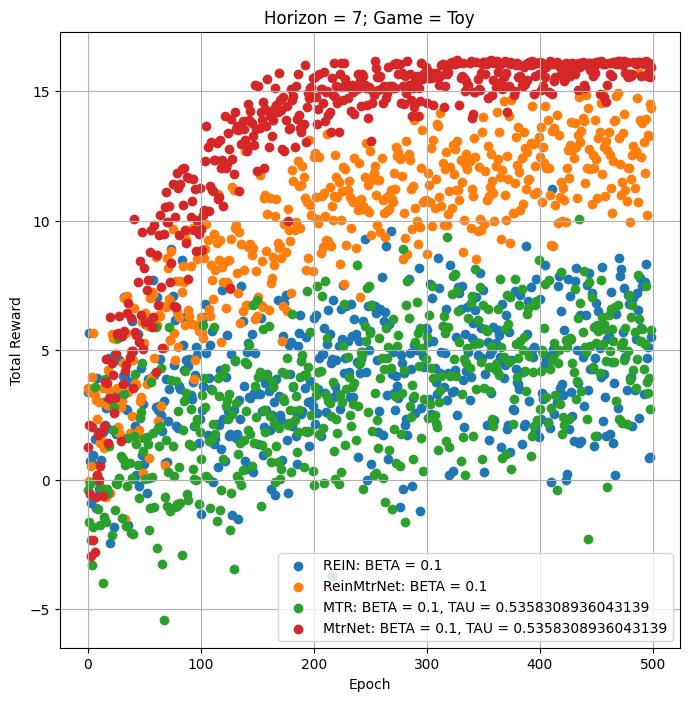

In [9]:
"""
        COMPARE REINFORCE VS MTR
        Remark: Run if you have trained both: Reinforce and Matryoshka.
"""
"""-------------------------------------------------------------------"""
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(range(len(loss_list_1)),loss_list_1, label=f"{agent1.name}: BETA = {agent1.beta}")
ax1.scatter(range(len(loss_list_2)),loss_list_2, label=f"{agent2.name}: BETA = {agent2.beta}")
ax1.scatter(range(len(loss_list_3)),loss_list_3, label=f"{agent3.name}: BETA = {agent3.beta}, TAU = {agent3.tau}")
ax1.scatter(range(len(loss_list_4)),loss_list_4, label=f"{agent4.name}: BETA = {agent4.beta}, TAU = {agent4.tau}")
ax1.set_title(f"Horizon = {HORIZON_MTR}; Game = {GAME_NAME}")
ax1.set_ylabel("Total Reward")
ax1.set_xlabel("Epoch")
ax1.grid()
ax1.legend()
plt.savefig(f'images/{GAME_NAME}_3.jpg', format='jpeg')
plt.show()

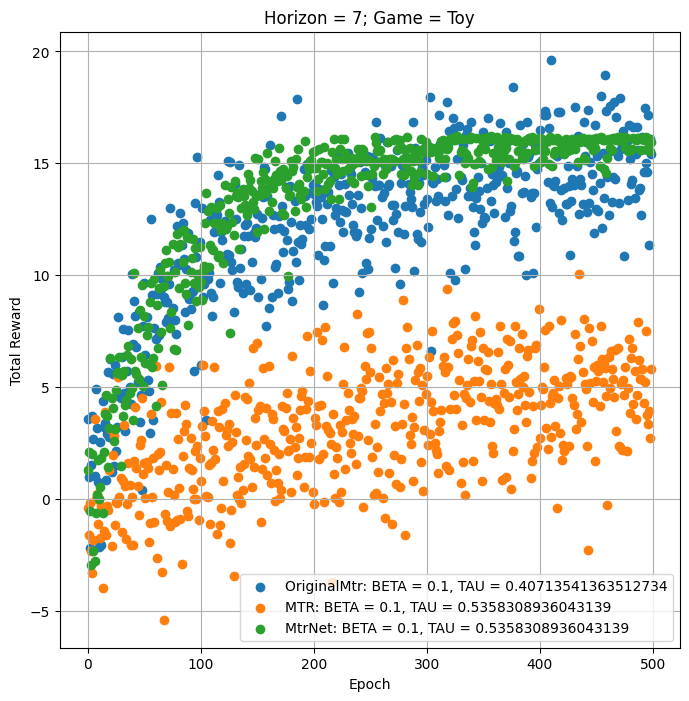

In [10]:
"""
        COMPARE ORIGINAL VS MTRNet VS MTR extra-dim.
        Remark: Run if you have trained both: Original and Matryoshka.
"""
"""-------------------------------------------------------------------"""
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(range(len(loss_list_5)),loss_list_5, label=f"{agent5.name}: BETA = {agent5.beta}, TAU = {agent5.tau}")
ax1.scatter(range(len(loss_list_3)),loss_list_3, label=f"{agent3.name}: BETA = {agent3.beta}, TAU = {agent3.tau}")
ax1.scatter(range(len(loss_list_4)),loss_list_4, label=f"{agent4.name}: BETA = {agent4.beta}, TAU = {agent4.tau}")
ax1.set_title(f"Horizon = {HORIZON_MTR}; Game = {GAME_NAME}")
ax1.set_ylabel("Total Reward")
ax1.set_xlabel("Epoch")
ax1.grid()
ax1.legend()
plt.savefig(f'images/{GAME_NAME}_4.jpg', format='jpeg')
plt.show()

In [12]:
"""
        TEST AGENT REINFORCE
"""
NUMBER_OF_EPISODES = 1
"""-------------------------------------------------------------------"""
from enviroment import render
render(agent1,env, NUMBER_OF_EPISODES)
render(agent2,env, NUMBER_OF_EPISODES)

In [8]:
"""
        TEST AGENT MATRYOSHKA
"""
NUMBER_OF_EPISODES = 1
"""-------------------------------------------------------------------"""
from enviroment import render
render(agent3,env,NUMBER_OF_EPISODES)
render(agent4,env,NUMBER_OF_EPISODES)

A . . . . . 
. . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 


In [9]:
"""
        TEST AGENT MATRYOSHKA ORIGINAL
"""
NUMBER_OF_EPISODES = 1
"""-------------------------------------------------------------------"""
from enviroment import render
render(agent5,env,NUMBER_OF_EPISODES)

A . . . . . 
. . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

A . . . . . 
. . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
A . . . . . 
. . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
. . . . . . 
A . # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
. . . . . . 
. A # . . . 
. . . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
. . . . . . 
. . # . . . 
. A . . . . 
. . . . G . 
. . . . . . 

. . . . . . 
. . . . . . 
. . # . . . 
. . A . . . 
. . . . G . 
. . . . . . 

. . . . . . 
. . . . . . 
. . # . . . 
. . . . . . 
. . A . G . 
. . . . . . 

. . . . . . 
. . . . . . 
. . # . . . 
. . . . . . 
. . . A G . 
. . . . . . 

. . . . . . 
. . . . . . 
. . # . . . 
. . . . . . 
. . . . A . 
. . . . . . 

